In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/water_potability.csv')
df.head(100)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
95,6.140878,197.876090,26687.874483,7.587196,329.231853,548.072761,15.836330,41.263648,5.359460,0
96,7.077874,220.670540,23873.378210,6.181840,341.987234,333.050786,10.661799,90.297770,4.764508,0
97,5.488314,135.802362,21485.153195,8.187416,280.603287,441.331137,14.860263,88.287346,5.066786,0
98,7.205559,120.327615,24627.867560,6.202469,289.768697,418.433290,13.643147,63.733732,3.710053,0


In [ ]:
df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


(None,
                 ph     Hardness        Solids  Chloramines      Sulfate  \
 count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
 mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
 std       1.594320    32.879761   8768.570828     1.583085    41.416840   
 min       0.000000    47.432000    320.942611     0.352000   129.000000   
 25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
 50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
 75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
 max      14.000000   323.124000  61227.196008    13.127000   481.030642   
 
        Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
 count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
 mean     426.205111       14.284970        66.396293     3.966786     0.390110  
 std       80.824064        3.308162        16.175008     0.7

**CHECKING THE DATA BY VISUALIZING IT**



<Axes: >

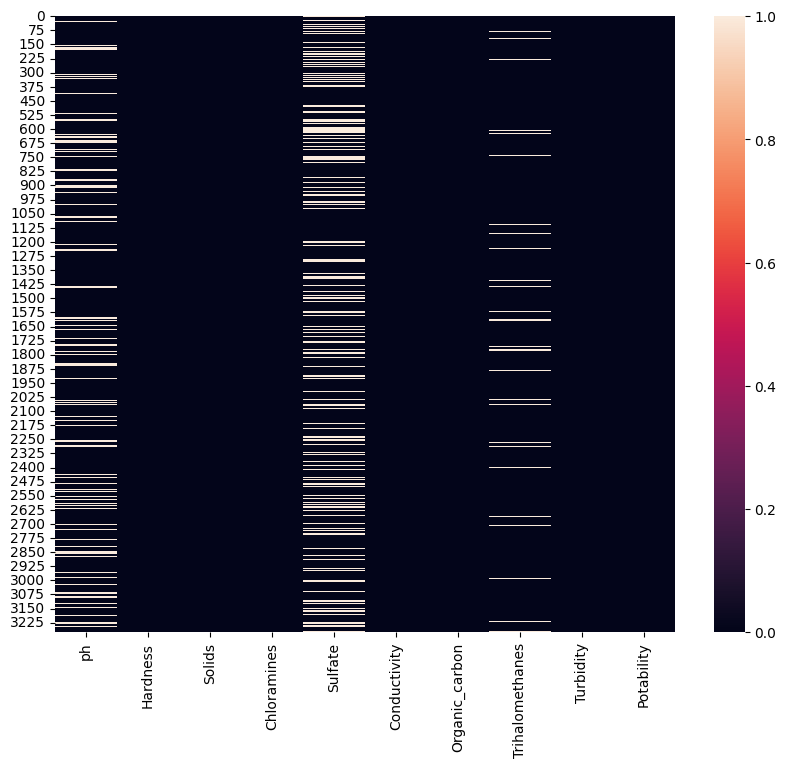

In [ ]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

<Axes: >

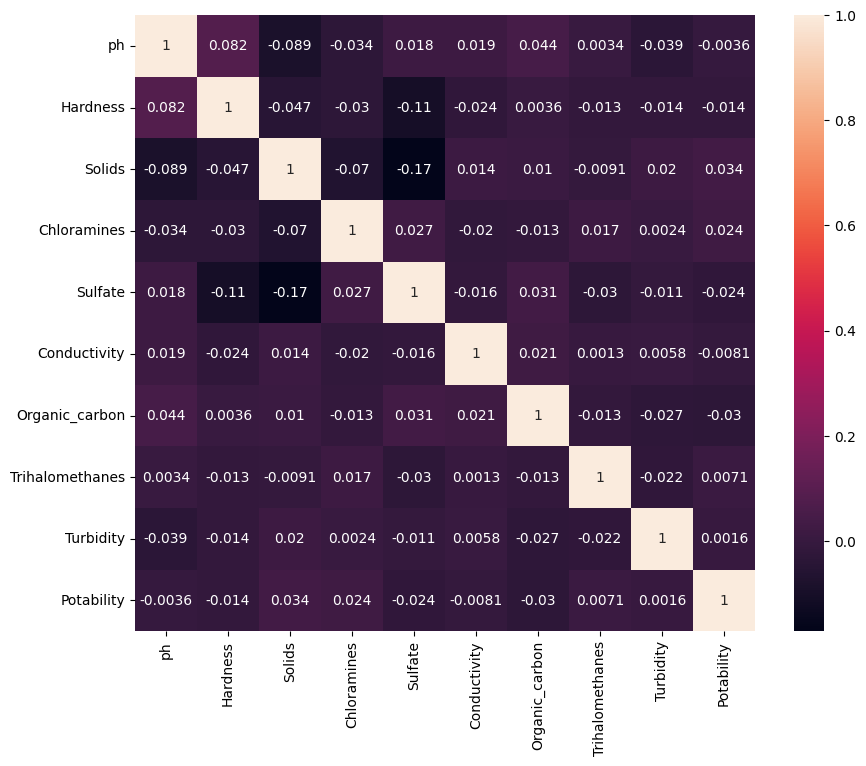

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

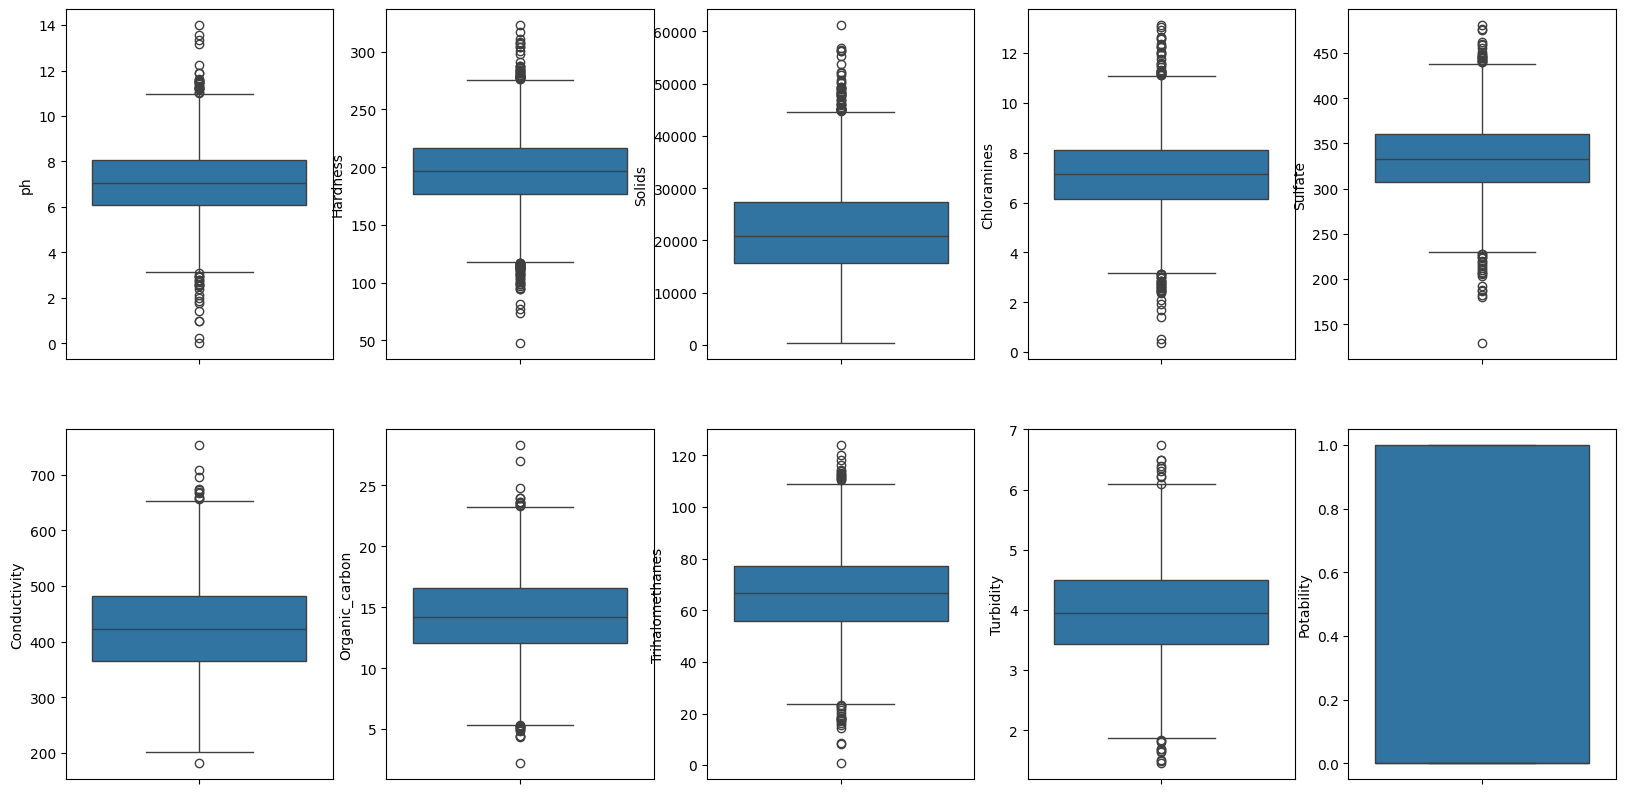

In [ ]:
#visualization of the dataset to check the outlier
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10))
ax = ax.flatten()
index=0
for col,values in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])
  index+=1

In [ ]:
fig = px.pie(df ,names="Potability",hole=0.4,template="plotly_dark")
fig.show()

In [ ]:
fig=px.scatter(df,x='ph',y='Sulfate',color='Potability',template='plotly_dark')
fig.show()

**FILLING THE NULL VALUES**

Text(0, 0.5, 'Percentage of misssing values')

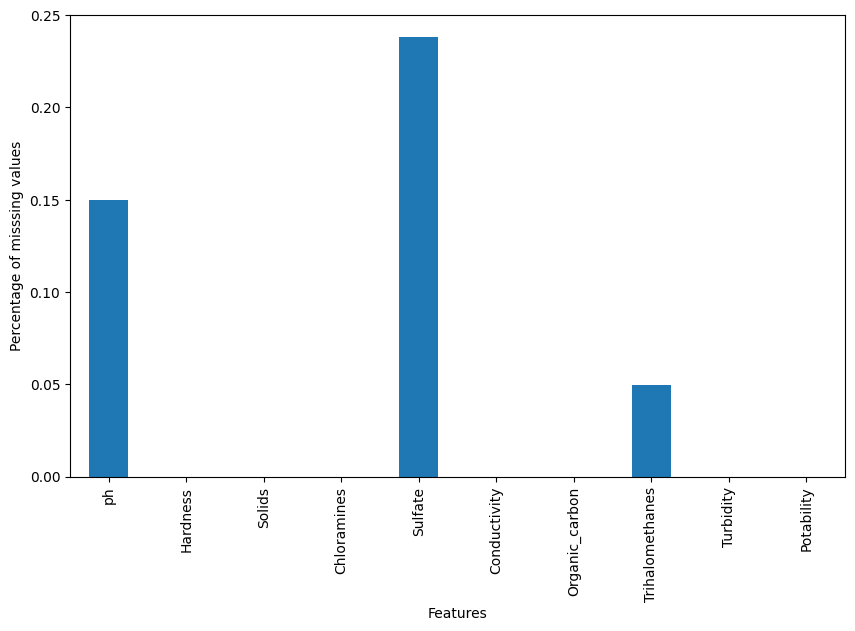

In [ ]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.xlabel("Features")
plt.ylabel("Percentage of misssing values")

In [ ]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

<Axes: >

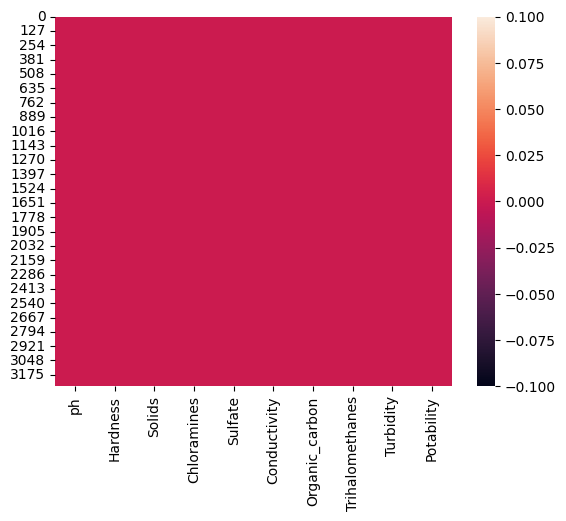

In [ ]:
sns.heatmap(df.isnull())

**SCALING THE DATA**

In [ ]:
x = df.drop("Potability",axis=1)
y = df["Potability"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

**SPLITING OUR DATA**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape , x_test.shape

((2620, 9), (656, 9))

**MODEL BULDING**

***1.LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

In [ ]:
model_lr = LogisticRegression()

In [ ]:
#training the Logistic Regression model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#prediction using Logistic Regression
pred_lr = model_lr.predict(x_test)

In [ ]:
#checking Accuracy
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

63.109756097560975

In [ ]:
cm1 = confusion_matrix(y_test,pred_lr)
cm1

array([[412,   0],
       [242,   2]])

***2.DECISION TREE CLASSIFIER***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth = 4)

In [ ]:
#Training the Decision Tree model
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
#Prediction using Decision Tree
pred_dt = model_dt.predict(x_test)

In [ ]:
#checking Accuracy
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

64.48170731707317

In [ ]:
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[395,  17],
       [216,  28]])

***3.RANDOM FOREST CLASSIFIER***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf  = RandomForestClassifier()

In [ ]:
#Training the Random forest
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#prediction using Random Forest
pred_rf = model_rf.predict(x_test)

In [ ]:
#checking Accuracy
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

68.59756097560977

In [ ]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[363,  49],
       [157,  87]])

***4.KNN -- K-Neighbors***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn =  KNeighborsClassifier()

In [ ]:
for i in range(4,21):
    model_knn =  KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_score_knn = accuracy_score(y_test,pred_knn)
    print(i,'.',accuracy_score_knn*100)


4 . 65.2439024390244
5 . 64.32926829268293
6 . 65.54878048780488
7 . 64.9390243902439
8 . 65.70121951219512
9 . 64.9390243902439
10 . 64.17682926829268
11 . 63.71951219512195
12 . 66.0060975609756
13 . 64.48170731707317
14 . 65.85365853658537
15 . 65.54878048780488
16 . 67.07317073170732
17 . 66.61585365853658
18 . 67.53048780487805
19 . 66.3109756097561
20 . 66.61585365853658


In [ ]:
model_knn =  KNeighborsClassifier(n_neighbors=15)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test,pred_knn)
print(accuracy_score_knn*100)

65.54878048780488


In [ ]:
cm4 = confusion_matrix(y_test,pred_knn)
cm4

array([[352,  60],
       [166,  78]])

***5.SUPPORT VECTOR MACHINE***

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC(kernel="rbf")

In [ ]:
#Training SVM
model_svm.fit(x_train,y_train)

SVC()

In [ ]:
#Making prediction using svm
pred_svm = model_svm.predict(x_test)

In [ ]:
#Accuracy score
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

68.75

In [ ]:
cm5 = confusion_matrix(y_test,pred_svm)
cm5

array([[380,  32],
       [173,  71]])

***FINIALIZING THE ACCURACY OF ALL THE MODELS***

In [ ]:
models = pd.DataFrame({
    "Model":["Logistic Rgression","Decision Tree","Random Forest","KNN","SVM"],
    "Accuracy Score" : [accuracy_score_lr*100,accuracy_score_dt*100,accuracy_score_rf*100,accuracy_score_knn*100
                       ,accuracy_score_svm*100]
})

,Model,Accuracy Score
4,SVM,68.750000
2,Random Forest,68.597561
3,KNN,65.548780
1,Decision Tree,64.481707
0,Logistic Rgression,63.109756


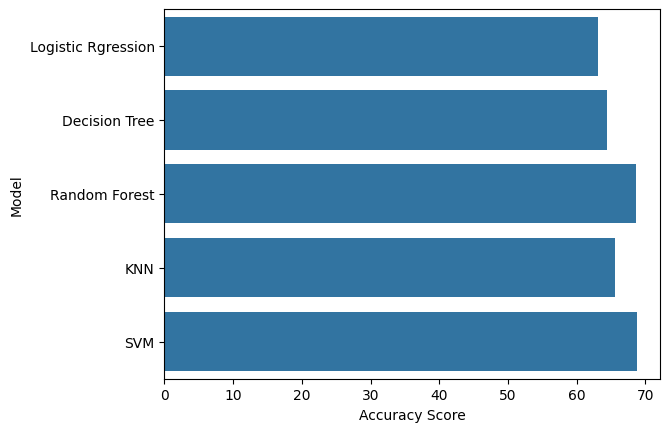

In [ ]:
sns.barplot(x="Accuracy Score",y="Model",data=models)
models.sort_values(by="Accuracy Score",ascending=False)

***PREDICTING SYSTEM***

In [ ]:
ph = float(input("PH VALUE:"))
hardness = float(input("HARDNESS:"))
solids = float(input("SOLIDS:"))
chloramines = float(input("CHLORAMINES:"))
sulfate =float(input("SULFATE:"))
conductivity =float(input("CONDUCTIVITY:"))
organic_carbons = float(input("ORGANIC_CARBONS:"))
trihalomethans= float(input("TRIHAL1OMETHANES:"))
turbidity = float(input("TURBIDITY:"))

# input_data = (ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbons,trihalomethans,turbidity)
# water_quality_prediction(input_data)
fp = model_dt.predict([[ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbons,trihalomethans,turbidity]])
print(fp)
if fp == 1:
  print("The water is 'SAFE' for consumption")
else:
  print("The water is 'NOT SAFE' for consumption")

PH VALUE:3.3
HARDNESS:230.3
SOLIDS:256.3
CHLORAMINES:225.4
SULFATE:254.6
CONDUCTIVITY:2.5
ORGANIC_CARBONS:6.3
TRIHAL1OMETHANES:2.3
TURBIDITY:1.2
[0]
The water is 'NOT SAFE' for consumption


In [ ]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
